In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# Data Cleaning and Exploratory Data Analysis¶

In [5]:
nypd = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv",index_col='ARREST_KEY')

In [6]:
nypd=nypd.dropna()

In [7]:
nypd

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
234117071,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK,989013,192652,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222884924,01/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
223918625,02/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
224323770,02/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)


In [14]:
import folium #maping crime on the map
from folium.plugins import HeatMap, MarkerCluster #making maping visually appealing
import json
from shapely.geometry import Point

In [15]:
df_point=nypd[['Latitude','Longitude']]

In [16]:
df_point

,Latitude,Longitude
ARREST_KEY,,
238013474,40.726187,-73.735234
236943583,40.636868,-73.891586
234938876,40.594145,-73.960415
234788259,40.824340,-73.910365
234117071,40.695469,-73.982825
...,...,...
222884924,40.846260,-73.901755
223918625,40.663302,-73.925425
224323770,40.623227,-74.149227


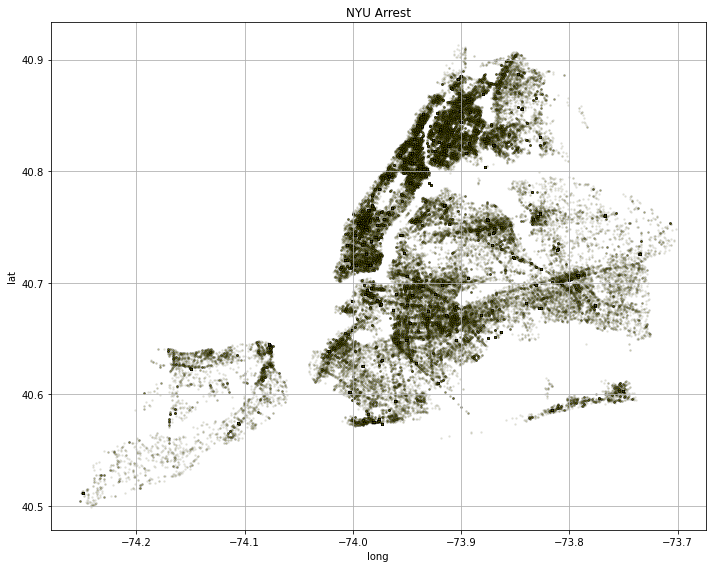

In [17]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Longitude", "Latitude", data = df_point, c = 'y',alpha = 0.1, edgecolor = 'black', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('NYU Arrest')
plt.tight_layout()
plt.axis('tight')

plt.show()

In [20]:
df_serious = nypd[nypd['LAW_CAT_CD']=="F"]
df_point=df_serious[['Latitude','Longitude']]

In [21]:
m = folium.Map(location=[40.7226,-74.00805],zoom_start=10)

cluster = MarkerCluster().add_to(m)

heat = HeatMap(df_point.values,
                min_opacity=0.1,
                radius=1, blur=1, 
                max_zoom=5)

heat.add_to(m)

In [22]:
m

In [ ]:
df_nonserious = nypd[nypd['LAW_CAT_CD']!="F"]
df_point=df_nonserious[['Latitude','Longitude']]

In [ ]:
m = folium.Map(location=[40.7226,-74.00805],zoom_start=10)

cluster = MarkerCluster().add_to(m)

heat = HeatMap(df_point.values,
                min_opacity=0.1,
                radius=1, blur=1, 
                max_zoom=5)

heat.add_to(m)

In [13]:
with open('/content/drive/MyDrive/DA project/nyc-police-precincts.geojson') as data_file:
    data = json.load(data_file)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DA project/nyc-police-precincts.geojson'

In [ ]:
count_by_precinct=pd.DataFrame({'count' : nypd.groupby( ["ARREST_PRECINCT"] ).size()}).reset_index()
count_by_precinct["ARREST_PRECINCT"]=count_by_precinct["ARREST_PRECINCT"].apply(str)
count_by_precinct.columns=['precinct','count']
count_by_precinct

In [ ]:
m